<a href="https://colab.research.google.com/github/khuie-alt/Masters/blob/main/Superstore_EDA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore EDA FINAL

by Kenneth Huie


## About this Data Set

### Summary
4 years of Global Superstore Order Data, from 2012-2015

**Data Source**

[4 years of Global Superstore Order Data](https://docs.google.com/spreadsheets/d/1jx6TXGmYCTSKKv_wbPz0eXB0nBYQP4R7/edit?usp=drive_link&ouid=104219005529465553399&rtpof=true&sd=true)

**Description**

The Global Superstore dataset contains detailed records of customer orders from a global retail company over a span of four years (2012-2015). The data includes transactional information for sales, shipping, product details, customer information, and regional data.

This dataset is commonly used for data analysis and business intelligence tasks, such as sales trend analysis, profit analysis, customer segmentation, and inventory management. It is helpful for exploring the relationship between sales, product categories, discounts, shipping methods, and customer demographics.

** Files**

Two Excel sheets:

- `Orders`: 51,290 rows, 24 columns
- `People`: 24 rows, 2 columns

## Data Dictionary

### Fields in `Orders`

51,290 records, each representing an order which a customer placed.

- **Row ID**: Unique identifier for each row in the dataset.
- **Order ID**: Unique identifier for each order.
- **Order Date**: The date the order was placed.
- **Ship Date**: The date the order was shipped.
- **Ship Mode**: Shipping method used for the order (e.g., Standard Class, Second Class, etc.).
- **Customer ID**: Unique identifier for the customer placing the order.
- **Customer Name**: Name of the customer who made the purchase.
- **Segment**: Customer segment type (e.g., Consumer, Corporate, Home Office).
- **Postal Code**: The postal code of the shipping address.
- **City**: The city where the order was shipped to.
- **State**: The state or province where the order was delivered.
- **Country**: The country where the order was shipped.
- **Region**: Geographical region for the order (e.g., East, West, Central).
- **Market**: The market or geographical area the order falls under.
- **Product ID**: Unique identifier for each product in the order.
- **Category**: Product category (e.g., Furniture, Office Supplies, Technology).
- **Sub-Category**: The subcategory under the main product category (e.g., Chairs, Binders, Phones).
- **Product Name**: The name of the product ordered.
- **Sales**: Total sales revenue generated from the sale of the product.
- **Quantity**: Number of units ordered for a particular product.
- **Discount**: Discount applied to the product as a percentage (0-1 scale).
- **Profit**: Profit earned from the sale of the product.
- **Shipping Cost**: The cost of shipping the product.
- **Order Priority**: The priority level of the order (e.g., High, Medium, Low).

Fields in `People`

24 records, each representing a person and the region they are from.

- **Person**: Person who belongs to the region.
- **Region**: Geographical region for the order (e.g., East, West, Central).

# Import Libraries and Set Notebook Defaults

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Set Notebook Defaults
pd.set_option('display.max_columns', None)

# Set Pandas to display numbers without scientific notation, and with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read, Review, and Prep Data

## Read Data Files

In [ ]:
# NEW read from Excel
# Specify object datatype for Postal Code and replace nulls with 'na'
# Set the file path as a variable
path = '/content/drive/MyDrive/Masters Courses/Descriptive Analytics and Data Integrity/Superstore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx'

# Read the data into df and specify an object data type for Postal Code
# This allows management of both numbers as text and nulls as textual nulls
df = pd.read_excel(path, dtype={'Postal Code': str})
# Ensure all Postal Code values contain at least 5 characters and fill with leading zeroes
df['Postal Code'] = df['Postal Code'].str.zfill(5).fillna('na')
# Replace '00nan' with 'na'
columns = ['Country', 'State', 'City', 'Postal Code']
df[columns]. sample (30)

,Country,State,City,Postal Code
26882,Niger,Niamey,Niamey,na
16840,India,Maharashtra,Thane,na
28750,Mexico,Sonora,Hermosillo,na
17353,United Kingdom,England,Leeds,na
21072,Turkey,Kayseri,Kayseri,na
2116,United Kingdom,England,Dudley,na
3199,Nigeria,Kano,Kano,na
15369,Indonesia,Jakarta,Jakarta,na
832,United States,Texas,Houston,77036
12821,Dominican Republic,Santo Domingo,Santo Domingo,na


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,na,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,na,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,na,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,na,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,na,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium


In [ ]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
8542,22171,IN-2012-AB1025527-41263,2012-12-20,2012-12-27,Standard Class,AB-1025527,Alejandro Ballentine,Home Office,na,Laohekou,Hubei,China,Eastern Asia,Asia Pacific,OFF-ST-4284,Office Supplies,Storage,"Fellowes Shelving, Single Width",115.74,2,0.00,15.00,4.58,Medium
18920,16942,ES-2013-GT14710139-41614,2013-12-06,2013-12-11,Standard Class,GT-14710139,Greg Tran,Consumer,na,London,England,United Kingdom,Northern Europe,Europe,OFF-ST-4267,Office Supplies,Storage,"Fellowes Lockers, Industrial",187.03,1,0.10,70.63,7.29,Medium
30657,28029,IN-2014-FW14395121-41945,2014-11-02,2014-11-06,Standard Class,FW-14395121,Fred Wasserman,Corporate,na,Colombo,Western,Sri Lanka,Southern Asia,Asia Pacific,OFF-BI-6405,Office Supplies,Binders,"Wilson Jones Index Tab, Recycled",27.24,4,0.00,12.48,1.29,Medium
19178,37080,CA-2013-XP21865140-41620,2013-12-12,2013-12-16,Second Class,XP-218651404,Xylona Preis,Consumer,95928,Chico,California,United States,Western US,USCA,OFF-PA-3508,Office Supplies,Paper,"Black Print Carbonless Snap-Off Rapid Letter, ...",36.44,4,0.00,16.40,4.67,Medium
38269,15349,ES-2015-LO1717045-42141,2015-05-17,2015-05-23,Standard Class,LO-1717045,Lori Olson,Corporate,na,Levallois-Perret,Ile-de-France,France,Western Europe,Europe,OFF-PA-4480,Office Supplies,Paper,"Green Bar Note Cards, Premium",89.37,3,0.00,32.13,6.57,Medium
31173,36022,CA-2014-LB16795140-41955,2014-11-12,2014-11-16,Standard Class,LB-167951408,Laurel Beltran,Home Office,32712,Apopka,Florida,United States,Southern US,USCA,OFF-AP-5937,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,671.54,3,0.20,50.37,50.61,High
5784,35349,CA-2012-SM20950140-41180,2012-09-28,2012-10-02,Standard Class,SM-209501406,Suzanne McNair,Corporate,19134,Philadelphia,Pennsylvania,United States,Eastern US,USCA,FUR-TA-4616,Furniture,Tables,"Hon 30"" x 60"" Table with Locking Drawer",409.27,2,0.40,-81.85,50.72,High
3180,29687,IN-2012-SC2023058-41081,2012-06-21,2012-06-25,Standard Class,SC-2023058,Scot Coram,Corporate,na,Avadi,Tamil Nadu,India,Southern Asia,Asia Pacific,OFF-SU-2984,Office Supplies,Supplies,"Acme Ruler, Easy Grip",36.66,2,0.00,2.88,2.00,Medium
16686,2242,MX-2013-PF1912031-41562,2013-10-15,2013-10-19,Standard Class,PF-1912031,Peter Fuller,Consumer,na,Contramaestre,Santiago de Cuba,Cuba,Caribbean,LATAM,OFF-AR-3495,Office Supplies,Art,"Binney & Smith Pens, Blue",39.80,5,0.00,2.30,4.66,High
42383,14652,IT-2015-AS1024045-42229,2015-08-13,2015-08-17,Second Class,AS-1024045,Alan Shonely,Consumer,na,Pamiers,Languedoc-Roussillon-Midi-Pyrénées,France,Western Europe,Europe,OFF-LA-4638,Office Supplies,Labels,"Hon Color Coded Labels, Adjustable",53.55,5,0.00,8.55,6.58,Medium


In [ ]:
# Get number of rows and columns
df.shape

(51290, 24)

In [ ]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.00",51290,51290,"51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,"25,645.50",2014-05-11 21:26:49.155780864,2014-05-15 20:42:42.745174528,246.49,3.48,0.14,28.61,26.48
min,1.00,2012-01-01 00:00:00,2012-01-03 00:00:00,0.44,1.00,0.00,"-6,599.98",1.00
25%,"12,823.25",2013-06-19 00:00:00,2013-06-23 00:00:00,30.76,2.00,0.00,0.00,2.61
50%,"25,645.50",2014-07-08 00:00:00,2014-07-12 00:00:00,85.05,3.00,0.00,9.24,7.79
75%,"38,467.75",2015-05-22 00:00:00,2015-05-26 00:00:00,251.05,5.00,0.20,36.81,24.45
max,"51,290.00",2015-12-31 00:00:00,2016-01-07 00:00:00,"22,638.48",14.00,0.85,"8,399.98",933.57
std,"14,806.29",NaN,NaN,487.57,2.28,0.21,174.34,57.25


In [ ]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,632,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,na,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,41296,915,2001,9994,5883,14302,227,31289,6146,227,29433


## Merge Files: Superstore `Orders` and `People`

In [ ]:
# Put the People data into a new data frame
df_1 = pd.read_excel('/content/drive/MyDrive/Masters Courses/Descriptive Analytics and Data Integrity/Superstore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name=1)
df_1.head()

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US


In [ ]:
# Get the shape of the data
df_1.shape

(24, 2)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  24 non-null     object
 1   Region  24 non-null     object
dtypes: object(2)
memory usage: 516.0+ bytes


In [ ]:
# Add people field to df by joining df_1 on Region
df = df.merge(df_1, how='left', on='Region')
df.sample(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
25507,40074,CA-2014-EA14035140-41823,2014-07-03,2014-07-04,First Class,EA-140351402,Erin Ashbrook,Corporate,77340,Huntsville,Texas,United States,Central US,USCA,OFF-PA-6563,Office Supplies,Paper,Xerox 201,41.47,8,0.20,14.52,6.68,High,Lon Bonher
34563,19721,IT-2015-KW1643545-42033,2015-01-29,2015-02-02,Standard Class,KW-1643545,Katrina Willman,Consumer,na,Le Havre,Normandy,France,Western Europe,Europe,TEC-PH-3146,Technology,Phones,"Apple Signal Booster, with Caller ID",464.61,4,0.15,-32.91,33.25,Medium,Gilbert Wolff
38479,48862,SA-2015-AR345110-42146,2015-05-22,2015-05-26,Standard Class,AR-345110,Alex Russell,Corporate,na,Riyadh,Ar Riyad,Saudi Arabia,Western Asia,Asia Pacific,OFF-FA-3019,Office Supplies,Fasteners,"Advantus Clamps, 12 Pack",18.72,1,0.00,2.97,1.30,Medium,Kaoru Xun
11974,35899,US-2013-BF11170140-41420,2013-05-26,2013-05-29,Second Class,BF-111701408,Ben Ferrer,Home Office,28540,Jacksonville,North Carolina,United States,Southern US,USCA,OFF-PA-6550,Office Supplies,Paper,Xerox 1991,18.27,1,0.20,5.94,1.33,High,Flannery Newton
38608,5061,MX-2015-SC2038093-42151,2015-05-27,2015-05-31,Standard Class,SC-2038093,Shahid Collister,Consumer,na,Managua,Managua,Nicaragua,Central America,LATAM,TEC-CO-3588,Technology,Copiers,"Brother Copy Machine, High-Speed",698.04,4,0.00,131.48,62.65,Medium,Nicodemo Bautista
12133,41419,TU-2013-Dl3600134-41426,2013-06-01,2013-06-05,Standard Class,Dl-3600134,Dorris liebe,Corporate,na,Kozan,Adana,Turkey,Western Asia,Asia Pacific,OFF-AP-4506,Office Supplies,Appliances,"Hamilton Beach Stove, Red",433.87,2,0.60,-162.71,33.47,Medium,Kaoru Xun
37007,16221,IT-2015-MP1796545-42109,2015-04-15,2015-04-21,Standard Class,MP-1796545,Michael Paige,Corporate,na,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Western Europe,Europe,OFF-LA-6050,Office Supplies,Labels,"Smead Removable Labels, 5000 Label Set",10.50,2,0.50,-3.78,1.77,Medium,Gilbert Wolff
38555,25247,IN-2015-GH1442558-42150,2015-05-26,2015-05-28,First Class,GH-1442558,Gary Hwang,Consumer,na,Dewas,Madhya Pradesh,India,Southern Asia,Asia Pacific,FUR-CH-5437,Furniture,Chairs,"Office Star Chairmat, Adjustable",341.55,5,0.00,30.60,81.92,Critical,Chandrakant Chaudhri
47374,30616,ID-2015-CC126857-42315,2015-11-07,2015-11-10,Second Class,CC-126857,Craig Carroll,Consumer,na,Geelong,Victoria,Australia,Oceania,Asia Pacific,OFF-AP-3867,Office Supplies,Appliances,"Cuisinart Microwave, White",663.84,4,0.40,-409.44,43.23,Medium,Kauri Anaru
525,42215,EG-2012-KW657038-40947,2012-02-08,2012-02-13,Standard Class,KW-657038,Kelly Williams,Consumer,na,Cairo,Al Qahirah,Egypt,North Africa,Africa,FUR-CH-5806,Furniture,Chairs,"SAFCO Swivel Stool, Black",331.02,2,0.00,119.16,1.16,Medium,Lindiwe Afolayan


## Review Fundamentals of Merged Dataframe

Now with the Person field added

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority,Person
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,50906
unique,25728,4,17415,796,3,632,3650,1102,165,23,5,3788,3,17,3788,4,22
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,na,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium,Gilbert Wolff
freq,14,30775,26,108,26518,41296,915,2001,9994,5883,14302,227,31289,6146,227,29433,5883


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,na,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,Lindiwe Afolayan
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,na,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,Hadia Bousaid
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,na,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,Nicodemo Bautista
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,na,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,Nicodemo Bautista
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,na,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium,Nicodemo Bautista


# Cleaning Steps

## Setting Data Types

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,object
City,object


### Postal Code Data Type
Changed postal code to int because there should only be whole numbers in this column.

In [ ]:
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce').astype('Int64')

In [ ]:
df['Postal Code']

,Postal Code
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
51285,<NA>
51286,<NA>
51287,<NA>
51288,<NA>


## Additional Cleaning Steps

### Missing Data

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [ ]:
df[df.isna().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,<NA>,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,<NA>,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,<NA>,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,<NA>,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,<NA>,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,<NA>,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,Lindiwe Afolayan
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,<NA>,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,Hadia Bousaid
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,<NA>,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,Nicodemo Bautista
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,<NA>,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,Nicodemo Bautista


### Inconsistent Text & Typos
No inconsistent data found

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.00",51290,51290,"9,994.00","51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,"25,645.50",2014-05-11 21:26:49.155780864,2014-05-15 20:42:42.745174528,"55,190.38",246.49,3.48,0.14,28.61,26.48
min,1.00,2012-01-01 00:00:00,2012-01-03 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98",1.00
25%,"12,823.25",2013-06-19 00:00:00,2013-06-23 00:00:00,"23,223.00",30.76,2.00,0.00,0.00,2.61
50%,"25,645.50",2014-07-08 00:00:00,2014-07-12 00:00:00,"56,430.50",85.05,3.00,0.00,9.24,7.79
75%,"38,467.75",2015-05-22 00:00:00,2015-05-26 00:00:00,"90,008.00",251.05,5.00,0.20,36.81,24.45
max,"51,290.00",2015-12-31 00:00:00,2016-01-07 00:00:00,"99,301.00","22,638.48",14.00,0.85,"8,399.98",933.57
std,"14,806.29",NaN,NaN,"32,063.69",487.57,2.28,0.21,174.34,57.25


## Updated Data Review Process and Descriptive Statistics

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,<NA>,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,<NA>,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,<NA>,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,<NA>,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,<NA>,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,<NA>,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,Lindiwe Afolayan
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,<NA>,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,Hadia Bousaid
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,<NA>,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,Nicodemo Bautista
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,<NA>,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,Nicodemo Bautista
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,<NA>,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium,Nicodemo Bautista


In [ ]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
24555,51185,TU-2014-JS5940134-41803,2014-06-13,2014-06-17,Second Class,JS-5940134,Joni Sundaresam,Home Office,<NA>,Kars,Kars,Turkey,Western Asia,Asia Pacific,OFF-BI-3293,Office Supplies,Binders,"Avery Index Tab, Clear",4.63,2,0.60,-3.83,1.99,High,Kaoru Xun
8256,21781,ID-2012-CS12130118-41257,2012-12-14,2012-12-16,First Class,CS-12130118,Chad Sievert,Consumer,<NA>,Seoul,Seoul,South Korea,Eastern Asia,Asia Pacific,TEC-MA-4207,Technology,Machines,"Epson Printer, White",391.55,3,0.50,-274.10,57.89,Medium,Hadia Bousaid
12298,1479,MX-2013-CC1247582-41431,2013-06-06,2013-06-11,Standard Class,CC-1247582,Cindy Chapman,Consumer,<NA>,Ixtapaluca,México,Mexico,Central America,LATAM,TEC-AC-5226,Technology,Accessories,"Memorex Router, USB",821.40,5,0.00,8.20,35.42,Medium,Nicodemo Bautista
35260,10513,ES-2015-LC1696064-42058,2015-02-23,2015-02-27,Standard Class,LC-1696064,Lindsay Castell,Home Office,<NA>,Rome,Lazio,Italy,Southern Europe,Europe,OFF-ST-4253,Office Supplies,Storage,"Fellowes Box, Wire Frame",112.50,10,0.40,11.10,11.46,Medium,Gavino Bove
12550,34277,CA-2013-GB14575140-41437,2013-06-12,2013-06-17,Standard Class,GB-145751406,Giulietta Baptist,Consumer,19134,Philadelphia,Pennsylvania,United States,Eastern US,USCA,FUR-FU-3908,Furniture,Furnishings,"DataProducts Ampli Magnifier Task Lamp, Black,",43.30,2,0.20,4.33,3.02,Medium,Dolores Davis
15934,7020,MX-2013-TH2123582-41541,2013-09-24,2013-09-29,Standard Class,TH-2123582,Tiffany House,Corporate,<NA>,Puebla,Puebla,Mexico,Central America,LATAM,TEC-PH-3134,Technology,Phones,"Apple Headset, VoIP",195.60,4,0.00,70.40,14.80,Medium,Nicodemo Bautista
21253,20142,ES-2014-GH1466545-41698,2014-02-28,2014-03-03,First Class,GH-1466545,Greg Hansen,Consumer,<NA>,Les Clayes-sous-Bois,Ile-de-France,France,Western Europe,Europe,OFF-ST-6262,Office Supplies,Storage,"Tenex Lockers, Industrial",552.50,3,0.10,110.42,53.34,Medium,Gilbert Wolff
38563,18858,IT-2015-JK1573064-42150,2015-05-26,2015-05-28,Second Class,JK-1573064,Joe Kamberova,Consumer,<NA>,Treviso,Veneto,Italy,Southern Europe,Europe,FUR-FU-3035,Furniture,Furnishings,"Advantus Frame, Erganomic",109.74,1,0.00,35.10,15.64,Medium,Gavino Bove
4184,7113,MX-2012-JC1534082-41130,2012-08-09,2012-08-11,Second Class,JC-1534082,Jasper Cacioppo,Consumer,<NA>,Tlalpan,Distrito Federal,Mexico,Central America,LATAM,OFF-ST-6065,Office Supplies,Storage,"Smead Trays, Blue",193.92,6,0.00,85.32,12.08,Medium,Nicodemo Bautista
26432,11493,IT-2014-SP20860139-41853,2014-08-02,2014-08-08,Standard Class,SP-20860139,Sung Pak,Corporate,<NA>,Birmingham,England,United Kingdom,Northern Europe,Europe,OFF-SU-4975,Office Supplies,Supplies,"Kleencut Box Cutter, Serrated",31.35,2,0.50,-17.61,1.58,Medium,Miina Nylund


In [ ]:
# Get the shape of the new data frame
df.shape

(51290, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   Int64         
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.00",51290,51290,"9,994.00","51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,"25,645.50",2014-05-11 21:26:49.155780864,2014-05-15 20:42:42.745174528,"55,190.38",246.49,3.48,0.14,28.61,26.48
min,1.00,2012-01-01 00:00:00,2012-01-03 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98",1.00
25%,"12,823.25",2013-06-19 00:00:00,2013-06-23 00:00:00,"23,223.00",30.76,2.00,0.00,0.00,2.61
50%,"25,645.50",2014-07-08 00:00:00,2014-07-12 00:00:00,"56,430.50",85.05,3.00,0.00,9.24,7.79
75%,"38,467.75",2015-05-22 00:00:00,2015-05-26 00:00:00,"90,008.00",251.05,5.00,0.20,36.81,24.45
max,"51,290.00",2015-12-31 00:00:00,2016-01-07 00:00:00,"99,301.00","22,638.48",14.00,0.85,"8,399.98",933.57
std,"14,806.29",NaN,NaN,"32,063.69",487.57,2.28,0.21,174.34,57.25


# Exploratory Data Analysis

## Numeric Fields

### Histograms

<Axes: xlabel='Sales', ylabel='Count'>

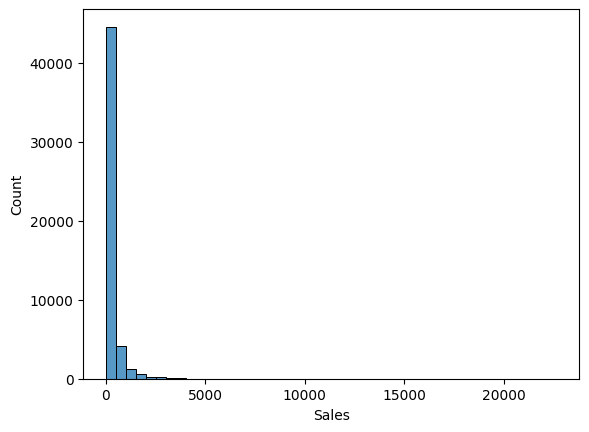

In [ ]:
sns.histplot(df['Sales'], binwidth=500)

In [ ]:
# Most of the sales are in the first bin which is less than 500. The graph is skewed right.

<Axes: xlabel='Quantity', ylabel='Count'>

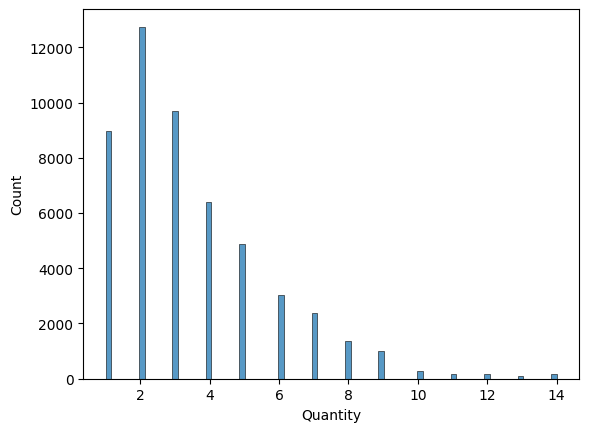

In [ ]:
sns.histplot(df['Quantity'])

In [ ]:
 # The highest quantity in two and there are generally more lower quantites. The graph is skewed to the right.

<Axes: xlabel='Discount', ylabel='Count'>

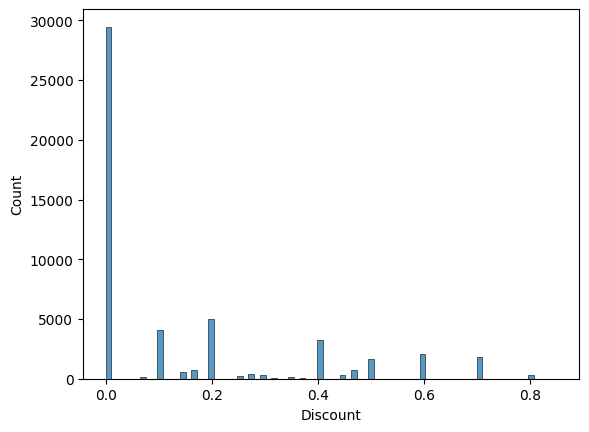

In [ ]:
sns.histplot(df['Discount'])

In [ ]:
# Most discounts fall on regular numbers and most of those are zero which is expected.
# It wouold be interesting to look into the discounts that are not on regular intervals.

<Axes: xlabel='Profit', ylabel='Count'>

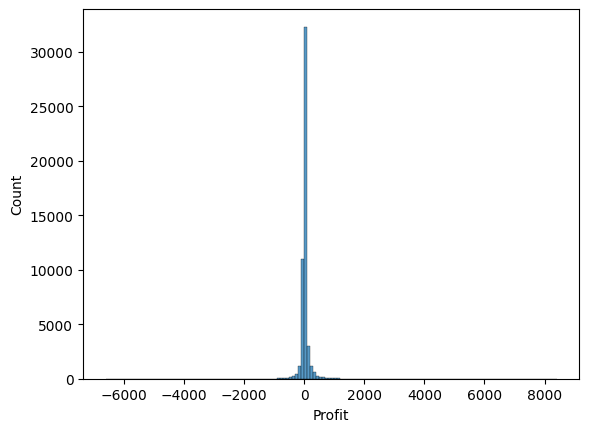

In [ ]:
sns.histplot(df['Profit'], binwidth=100)

In [ ]:
# Most of the Profits are around 0 with very steep curves either way.

<Axes: xlabel='Shipping Cost', ylabel='Count'>

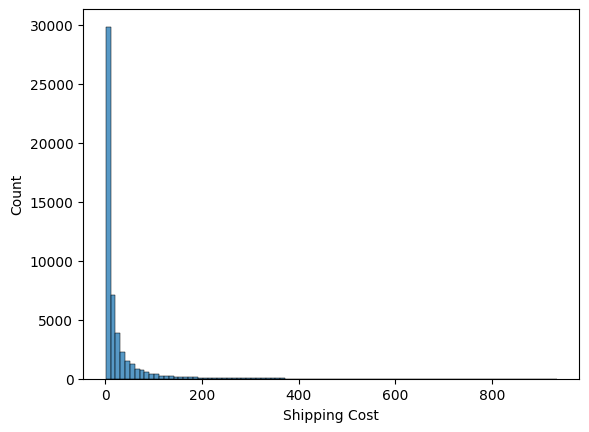

In [ ]:
sns.histplot(df['Shipping Cost'], binwidth=10)

In [ ]:
# The curve of the graph is right skewed with most shipping coste being low.

### Boxplot

<Axes: xlabel='Sales'>

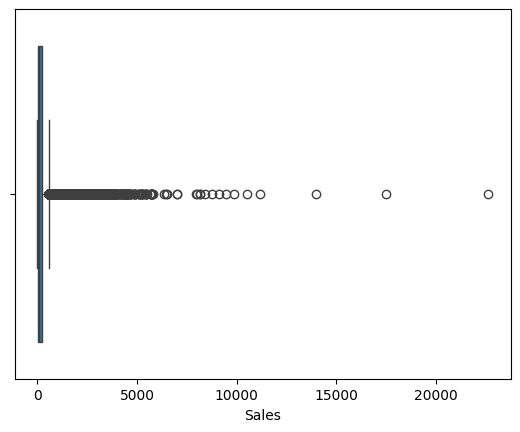

In [ ]:
sns.boxplot(x=df['Sales'])

In [ ]:
# This boxplot tells us that most sales are near 0. It looks like there are a lot of outliers, but that is because there are so many transactions.

<Axes: xlabel='Quantity'>

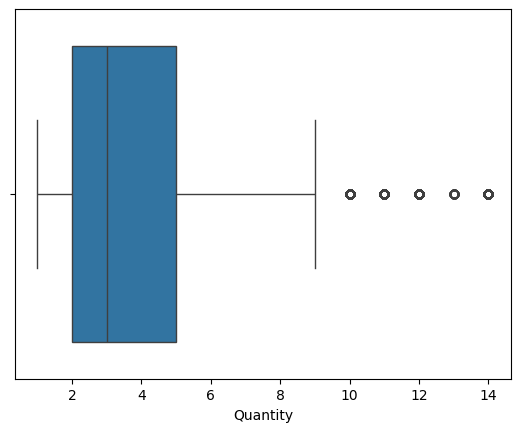

In [ ]:
sns.boxplot(x=df['Quantity'])

In [ ]:
# This is a normal looking boxplot with a few outliers. It shows the medium is about 3.

<Axes: xlabel='Discount'>

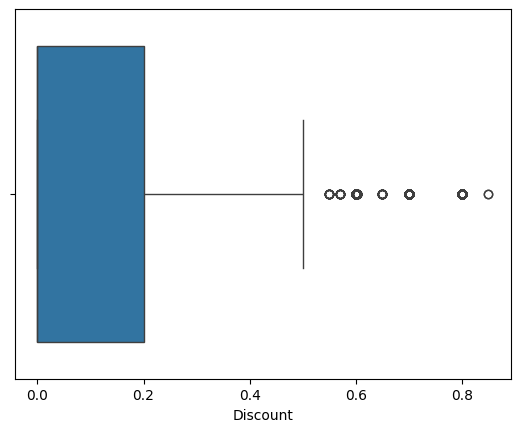

In [ ]:
sns.boxplot(x=df['Discount'])

In [ ]:
# There is no laft outlier bar because 0 is the most common discount and there is nothing less than 0.
# It shows we should look into discounts above .5 because these are likely outliers.

<Axes: xlabel='Profit'>

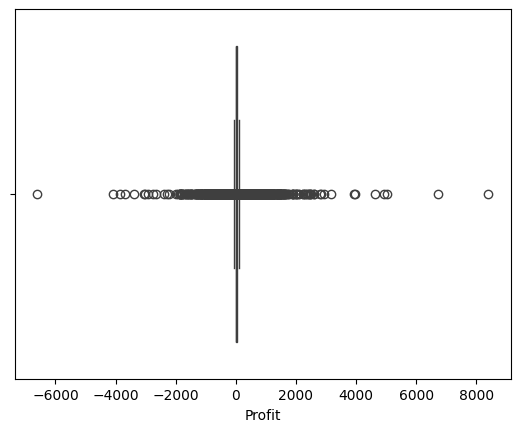

In [ ]:
sns.boxplot(x=df['Profit'])

In [ ]:
# The boxplot is condensed at 0 so much that we can't see any tails.
# In reality, the tails should go out further because all of the current outliers shouldn't be outliers

<Axes: xlabel='Shipping Cost'>

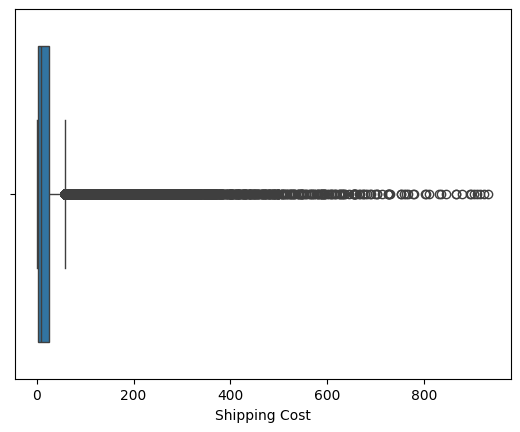

In [ ]:
sns.boxplot(x=df['Shipping Cost'])

In [ ]:
# There are a lot of outliers because shipping cost is condensed around a few dollars. It would be good to look into some of the higher outliers.

## Categorical Fields

### Bar Plots

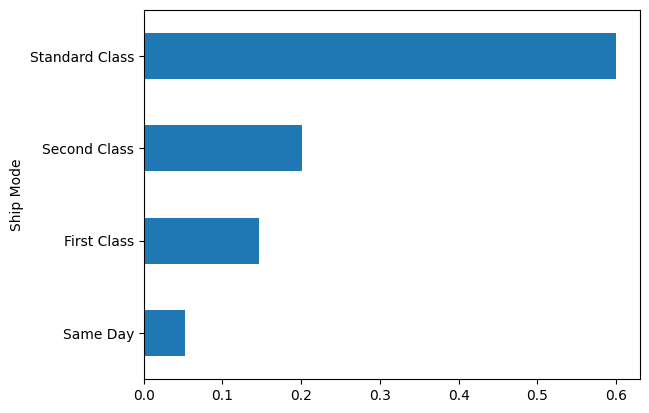

In [ ]:
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# Standard class makes up about 60% of all shipping modes.

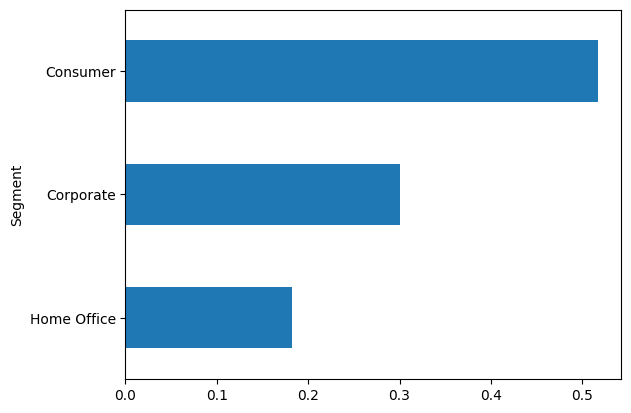

In [ ]:
data = df['Segment'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# Half of our business is from the consumer segment.

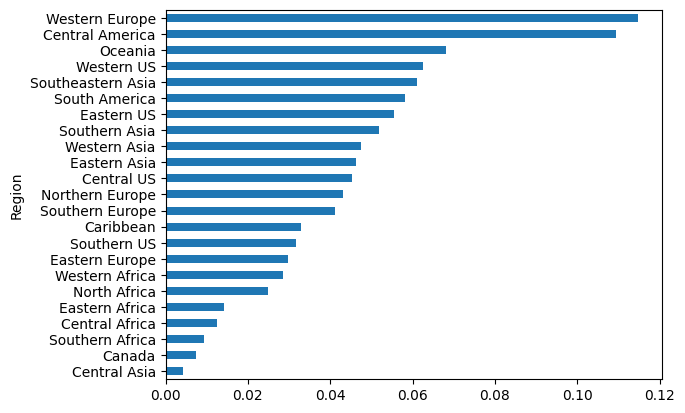

In [ ]:
data = df['Region'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# US and Europe make up the top regions. Africa has very few sales.

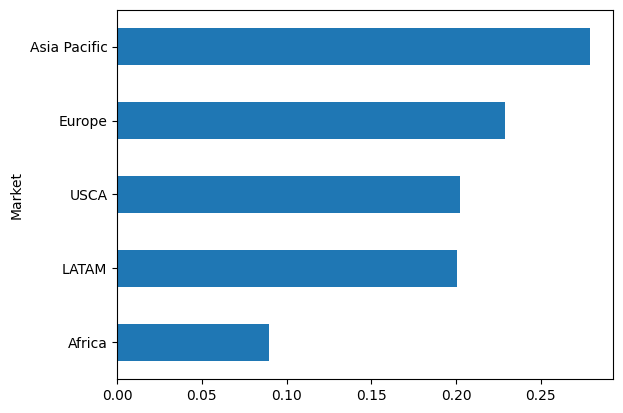

In [ ]:
data = df['Market'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# Asia Pacific surprisingly outpaces Europe and the US in market share.

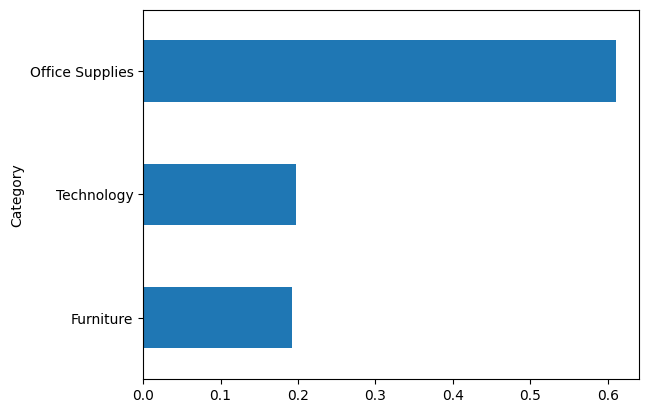

In [ ]:
data = df['Category'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# Office supplies are by far our most sold category.

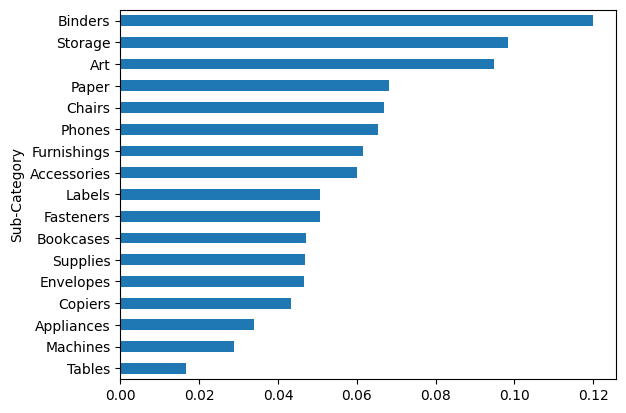

In [ ]:
data = df['Sub-Category'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# Tables, machines, and appliances are the lowest which makles sense because they are generally bigger and purchased less frequently.

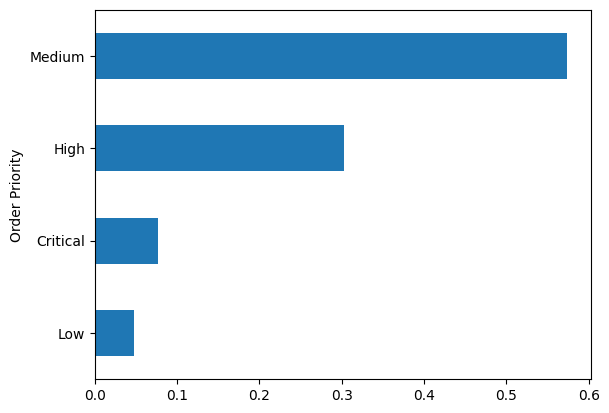

In [ ]:
data = df['Order Priority'].value_counts(ascending=True, normalize=True)
data.plot.barh();

In [ ]:
# Orders are generally pretty urgent as 90% are medium or high priority.

## Bar Charts for Categorical and Numeric Fields

In [ ]:
df['Segment'].value_counts()

,count
Segment,
Consumer,26518
Corporate,15429
Home Office,9343


In [ ]:
df['Sales'].describe()

,Sales
count,"51,290.00"
mean,246.49
std,487.57
min,0.44
25%,30.76
50%,85.05
75%,251.05
max,"22,638.48"


In [ ]:
df.groupby('Segment')['Sales'].sum()

,Sales
Segment,
Consumer,"6,507,949.42"
Corporate,"3,824,697.52"
Home Office,"2,309,854.97"


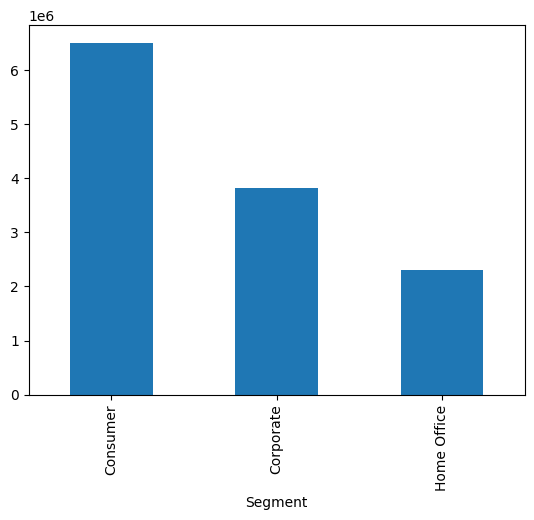

In [ ]:
data = df.groupby('Segment')['Sales'].sum()
data.plot.bar();

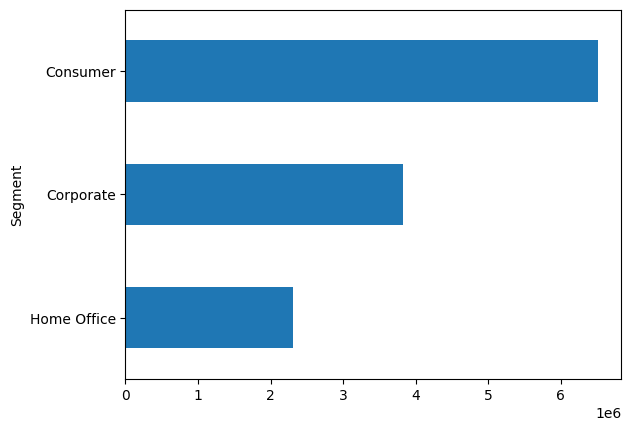

In [ ]:
data = df.groupby('Segment')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
df.groupby('Region')['Sales'].sum()

,Sales
Region,
Canada,"66,928.17"
Caribbean,"324,280.86"
Central Africa,"143,630.01"
Central America,"1,223,100.63"
Central Asia,"19,311.46"
Central US,"501,239.89"
Eastern Africa,"127,856.02"
Eastern Asia,"855,059.39"
Eastern Europe,"310,033.44"


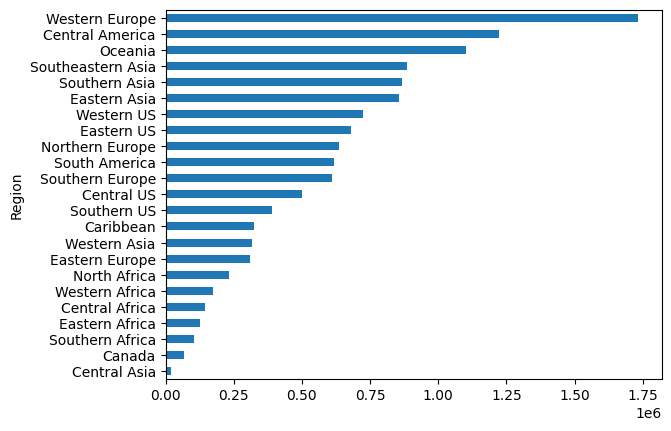

In [ ]:
data = df.groupby('Region')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
df.groupby('Market')['Sales'].sum()

,Sales
Market,
Africa,"783,773.21"
Asia Pacific,"4,042,658.27"
Europe,"3,287,336.23"
LATAM,"2,164,605.17"
USCA,"2,364,129.03"


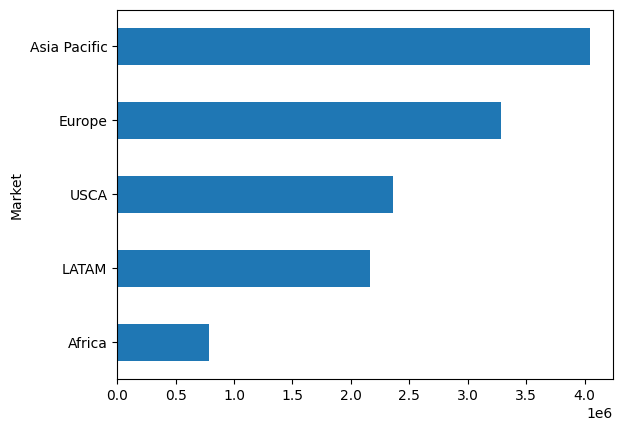

In [ ]:
data = df.groupby('Market')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
df.groupby('Category')['Sales'].sum()

,Sales
Category,
Furniture,"4,110,451.90"
Office Supplies,"3,787,492.51"
Technology,"4,744,557.50"


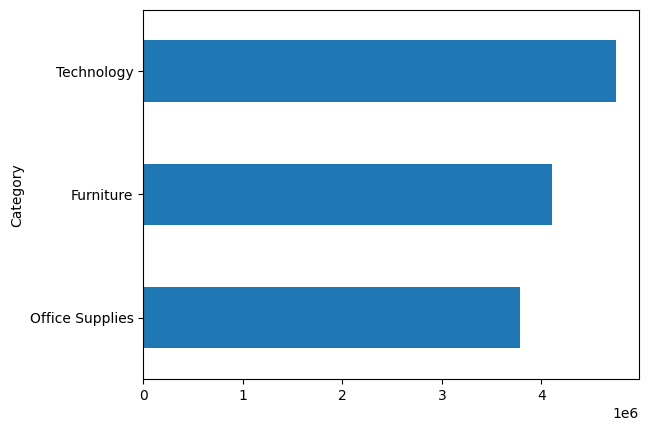

In [ ]:
data = df.groupby('Category')['Sales'].sum().sort_values()
data.plot.barh();

Sub-Category
Phones        1,706,824.14
Copiers       1,509,436.27
Chairs        1,501,681.76
Bookcases     1,466,572.24
Storage       1,126,812.97
Appliances    1,010,535.53
Machines        779,060.07
Tables          757,041.92
Accessories     749,237.02
Binders         461,869.39
Furnishings     385,155.97
Art             371,613.15
Supplies        242,811.13
Paper           241,787.53
Envelopes       169,217.49
Fasteners        89,495.05
Labels           73,350.28
Name: Sales, dtype: float64


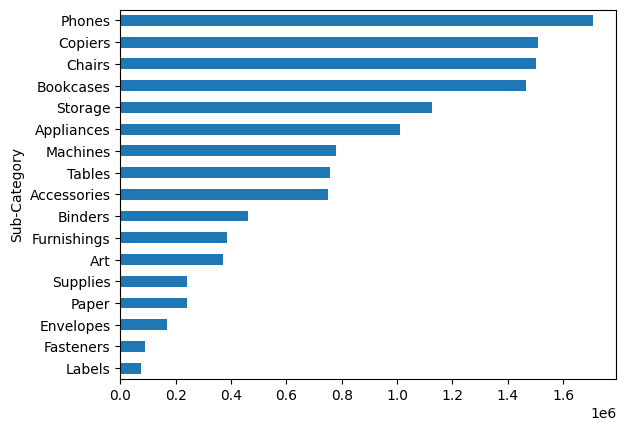

In [ ]:
rawdata = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(rawdata)
data = df.groupby('Sub-Category')['Sales'].sum().sort_values()
data.plot.barh();

## Time Series (Dates)
Explore our data over time using `Order Date`

In [ ]:
# Group sales data by Year and Month
# creates a new dataframe: monthly_sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales ['Order Date'].astype(str) # Convert to string for plotting
monthly_sales.head()

,Order Date,Sales
0,2012-01,"98,898.49"
1,2012-02,"103,717.92"
2,2012-03,"135,746.40"
3,2012-04,"114,332.96"
4,2012-05,"158,228.33"


In [ ]:
monthly_sales

,Order Date,Sales
0,2012-01,"98,898.49"
1,2012-02,"103,717.92"
2,2012-03,"135,746.40"
3,2012-04,"114,332.96"
4,2012-05,"158,228.33"
5,2012-06,"207,571.54"
6,2012-07,"118,434.88"
7,2012-08,"208,063.28"
8,2012-09,"284,587.75"
9,2012-10,"216,114.57"


In [ ]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  48 non-null     object 
 1   Sales       48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


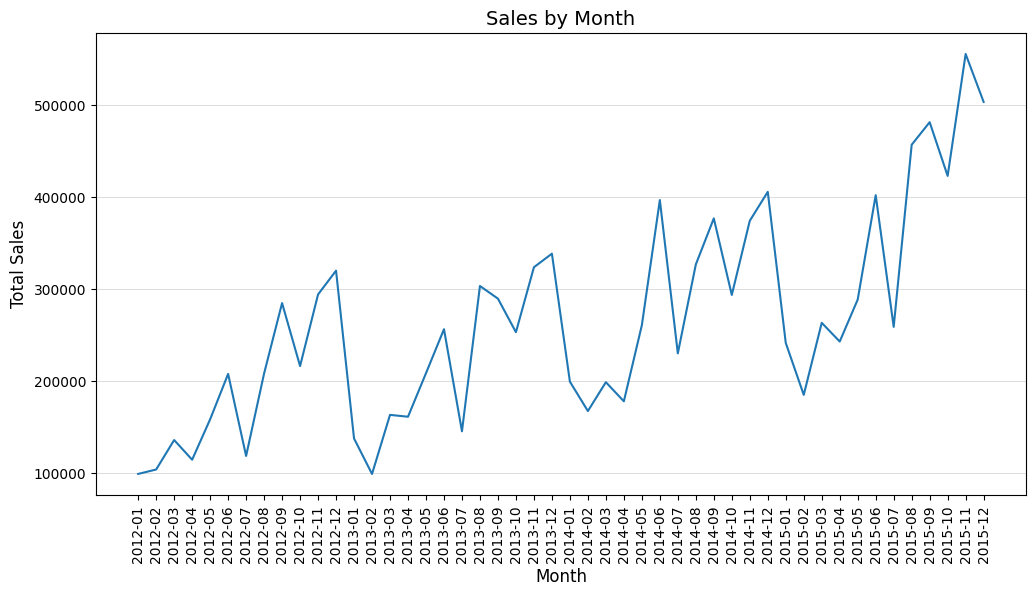

In [ ]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])

# Formatting the plot
plt. title('Sales by Month', fontsize=14)
plt.xlabel( 'Month', fontsize=12)
plt.ylabel( 'Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

In [ ]:
# Create a Sales by Quarter Dataframe
# Group sales data by Year and Quarter
# creates a new dataframe: quarterly_sales
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()
quarterly_sales['Order Date'] = quarterly_sales['Order Date'].astype(str).str. replace('Q', '-Q')
# Convert to string for plotting
quarterly_sales.head(10)

,Order Date,Sales
0,2012-Q1,"338,362.81"
1,2012-Q2,"480,132.84"
2,2012-Q3,"611,085.92"
3,2012-Q4,"829,869.33"
4,2013-Q1,"399,367.71"
5,2013-Q2,"625,592.86"
6,2013-Q3,"737,768.89"
7,2013-Q4,"914,709.23"
8,2014-Q1,"565,019.59"
9,2014-Q2,"834,839.49"


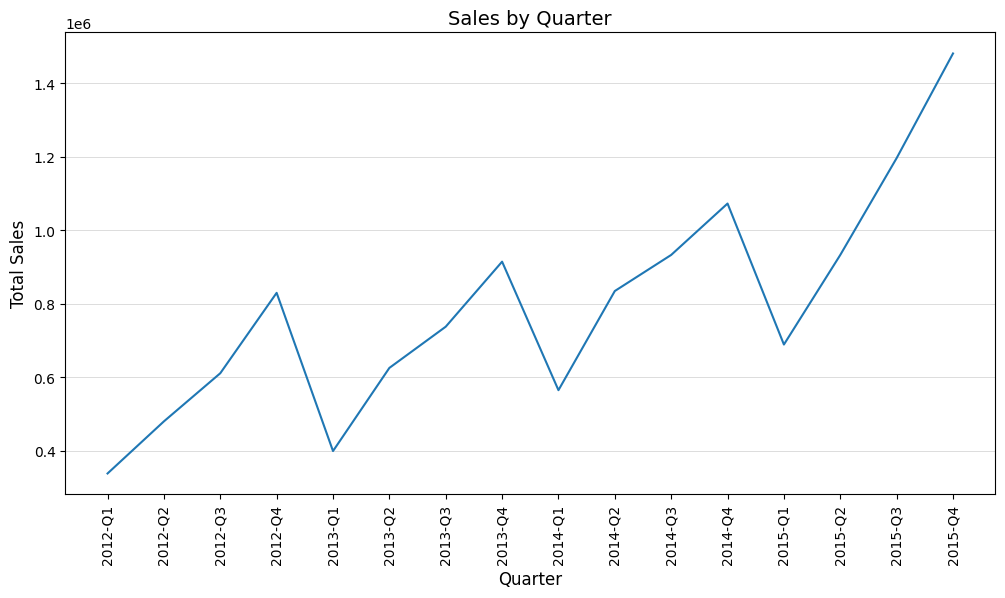

In [ ]:
# Display Quarter Sales
# Plot the line chart using Matplotlib
plt. figure(figsize=(12, 6))
plt.plot(quarterly_sales ['Order Date'], quarterly_sales ['Sales'])
# Formatting the plot
plt. title('Sales by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show the plot
plt. show()

## Time Series using the Resample Method

In [ ]:
monthly_sales_rs = df.resample('ME', on='Order Date')['Sales'].sum().reset_index()
monthly_sales_rs.head(30)

,Order Date,Sales
0,2012-01-31,"98,898.49"
1,2012-02-29,"103,717.92"
2,2012-03-31,"135,746.40"
3,2012-04-30,"114,332.96"
4,2012-05-31,"158,228.33"
5,2012-06-30,"207,571.54"
6,2012-07-31,"118,434.88"
7,2012-08-31,"208,063.28"
8,2012-09-30,"284,587.75"
9,2012-10-31,"216,114.57"


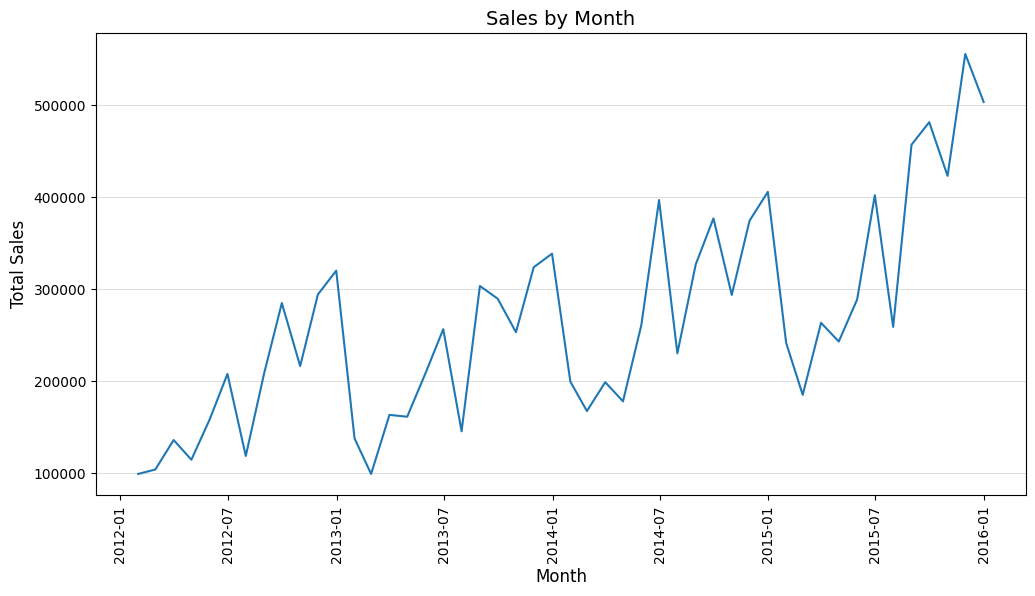

In [ ]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_rs['Order Date'], monthly_sales_rs['Sales'])

# Formatting the plot
plt. title('Sales by Month', fontsize=14)
plt.xlabel( 'Month', fontsize=12)
plt.ylabel( 'Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

In [ ]:
quarterly_sales_rs = df.resample('QE', on='Order Date')['Sales'].sum().reset_index()
quarterly_sales_rs.head(30)

,Order Date,Sales
0,2012-03-31,"338,362.81"
1,2012-06-30,"480,132.84"
2,2012-09-30,"611,085.92"
3,2012-12-31,"829,869.33"
4,2013-03-31,"399,367.71"
5,2013-06-30,"625,592.86"
6,2013-09-30,"737,768.89"
7,2013-12-31,"914,709.23"
8,2014-03-31,"565,019.59"
9,2014-06-30,"834,839.49"


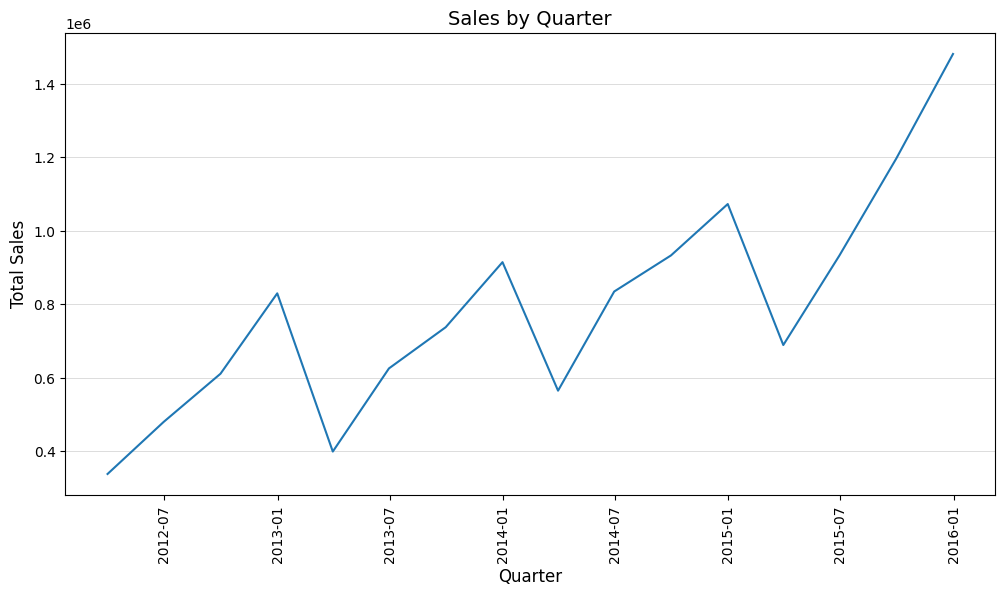

In [ ]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales_rs['Order Date'], quarterly_sales_rs['Sales'])

# Formatting the plot
plt. title('Sales by Quarter', fontsize=14)
plt.xlabel( 'Quarter', fontsize=12)
plt.ylabel( 'Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

## Customizations and Innovations

**Add customizations to the line chart such as data points with labels, different color line, and wider line**

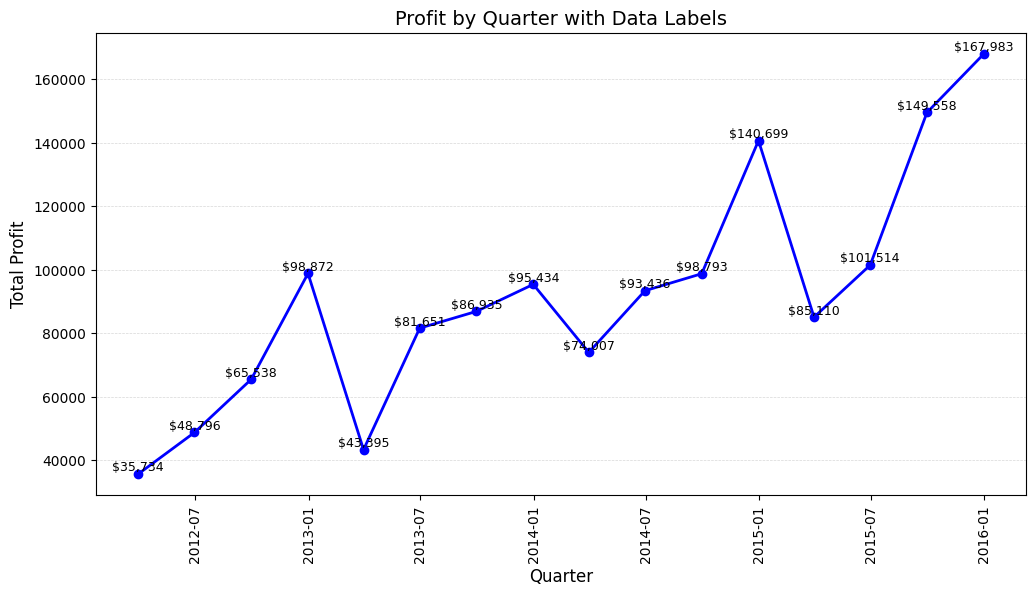

In [ ]:
quarterly_profit_rs = df.resample('QE', on='Order Date')['Profit'].sum().reset_index()

# Plotting with some customizations like dollar format and data point labels
plt.figure(figsize=(12, 6))
plt.plot(quarterly_profit_rs['Order Date'], quarterly_profit_rs['Profit'], marker='o', color='b', linestyle='-', linewidth=2)

# Adding data point labels
for i in range(len(quarterly_profit_rs)):
    plt.text(quarterly_profit_rs['Order Date'][i], quarterly_profit_rs['Profit'][i], f"${quarterly_profit_rs['Profit'][i]:,.0f}",
             horizontalalignment='center', verticalalignment='bottom', fontsize=9, color='black')

# Formatting the plot
plt.title('Profit by Quarter with Data Labels', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.show()

**Create filled line plots with different colors**

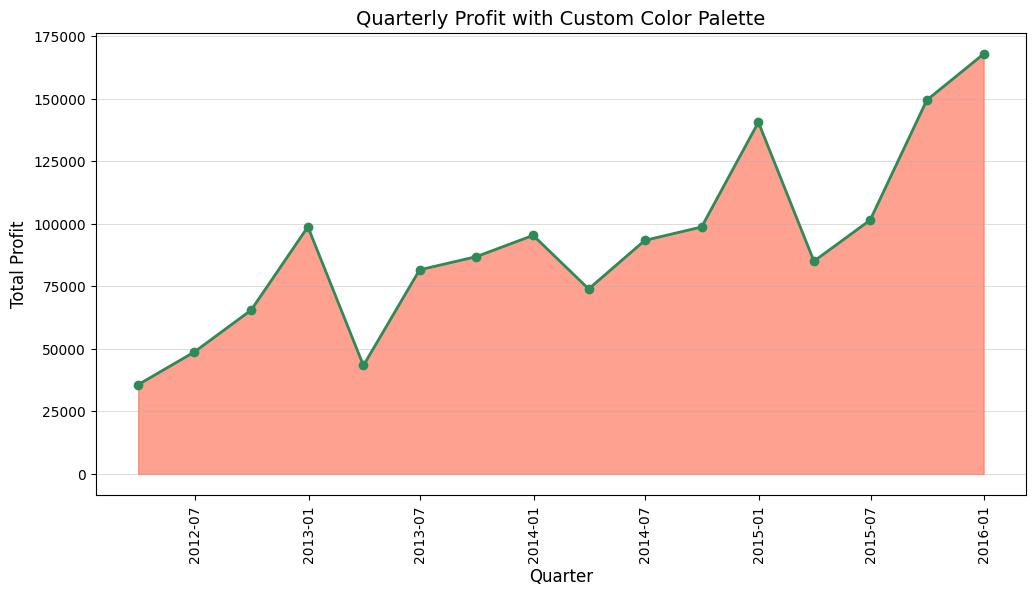

In [ ]:
# Create a filled line plot with a custom color palette
plt.figure(figsize=(12, 6))

# Custom color for the filled area
plt.fill_between(quarterly_profit_rs['Order Date'], quarterly_profit_rs['Profit'],
                 color='#FF6347', alpha=0.6)  # Tomato color for fill

# Custom color for the line
plt.plot(quarterly_profit_rs['Order Date'], quarterly_profit_rs['Profit'],
         marker='o', color='#2E8B57', linewidth=2)  # SeaGreen color for the line

# Formatting the plot
plt.title('Quarterly Profit with Custom Color Palette', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

**Create a violin plot**

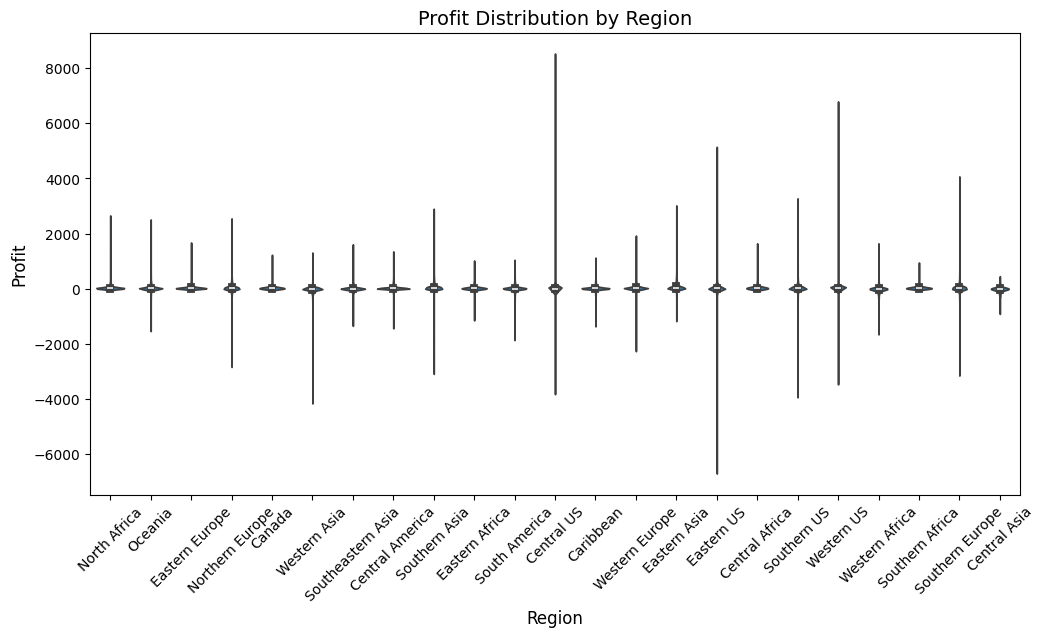

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Profit', data=df)

# Formatting the plot
plt.title('Profit Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Create a trend line graph with different customizations**

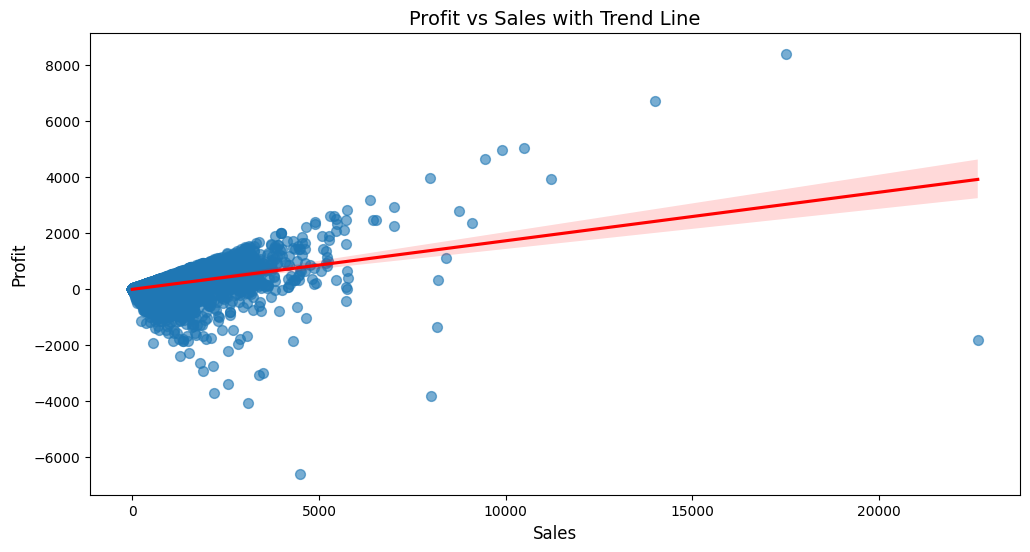

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})

# Formatting the plot
plt.title('Profit vs Sales with Trend Line', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Show the plot
plt.show()

**Add a custom Legend and color to the line chart**

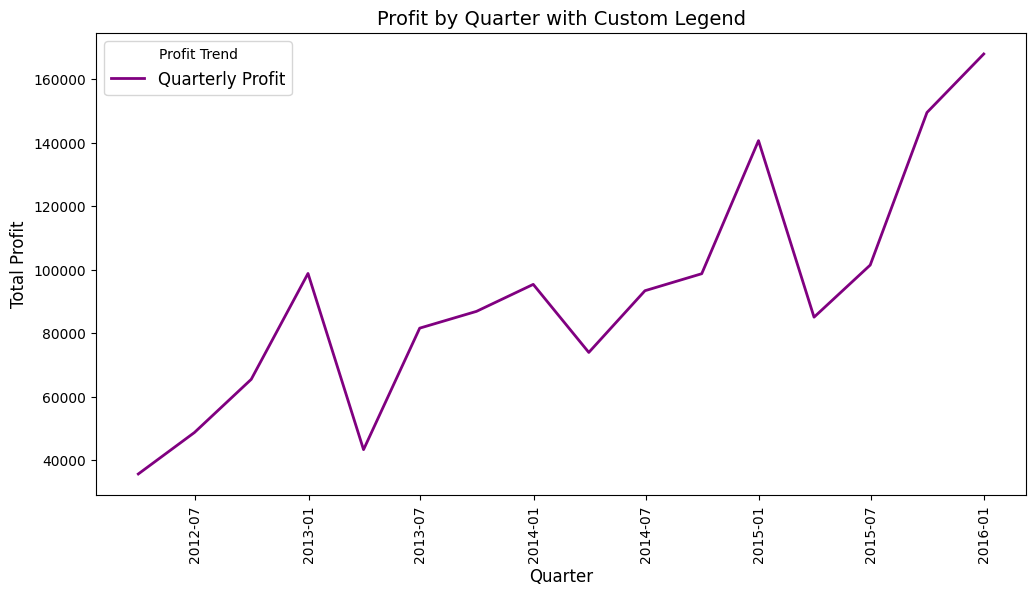

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_profit_rs['Order Date'], quarterly_profit_rs['Profit'], label='Quarterly Profit', color='purple', linewidth=2)

# Adding a custom legend
plt.legend(title='Profit Trend', loc='upper left', fontsize=12)

# Formatting the plot
plt.title('Profit by Quarter with Custom Legend', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.show()

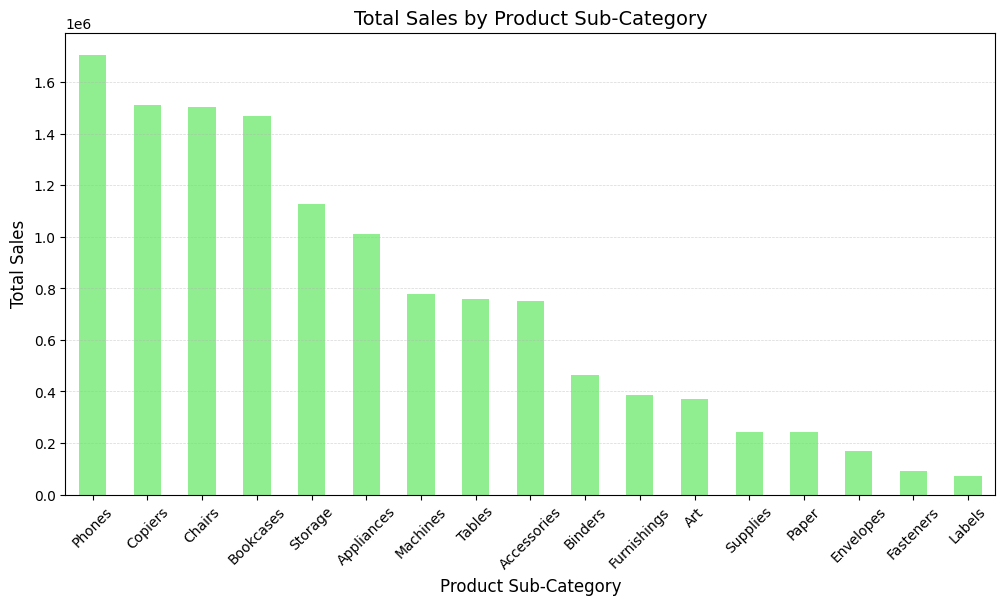

In [ ]:
plt.figure(figsize=(12, 6))
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Plotting the bar chart
sub_category_sales.plot(kind='bar', color='lightgreen')

# Formatting the plot
plt.title('Total Sales by Product Sub-Category', fontsize=14)
plt.xlabel('Product Sub-Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.show()


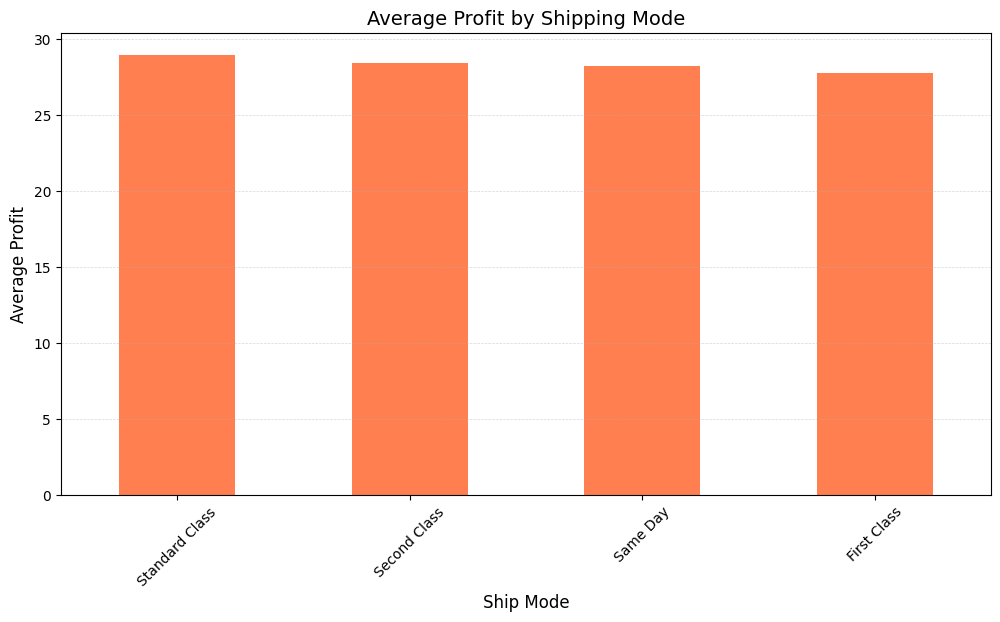

In [ ]:
plt.figure(figsize=(12, 6))
avg_profit_ship_mode = df.groupby('Ship Mode')['Profit'].mean().sort_values(ascending=False)

# Plotting the bar chart
avg_profit_ship_mode.plot(kind='bar', color='coral')

# Formatting the plot
plt.title('Average Profit by Shipping Mode', fontsize=14)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.show()


<ipython-input-101-f3b4f5f7a7b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Priority', y='Profit', data=df, palette='Blues')


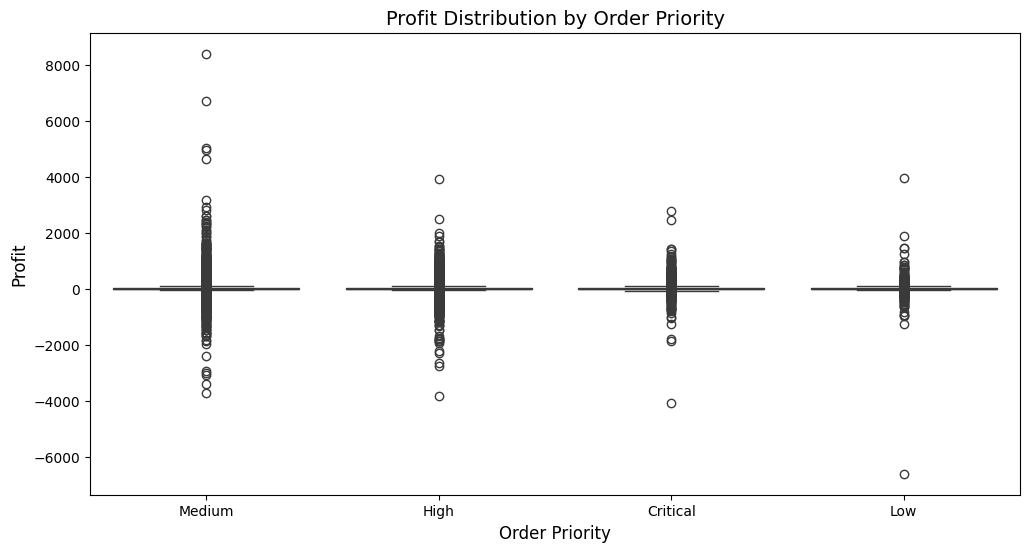

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot of profit by order priority
sns.boxplot(x='Order Priority', y='Profit', data=df, palette='Blues')

# Formatting the plot
plt.title('Profit Distribution by Order Priority', fontsize=14)
plt.xlabel('Order Priority', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Show the plot
plt.show()


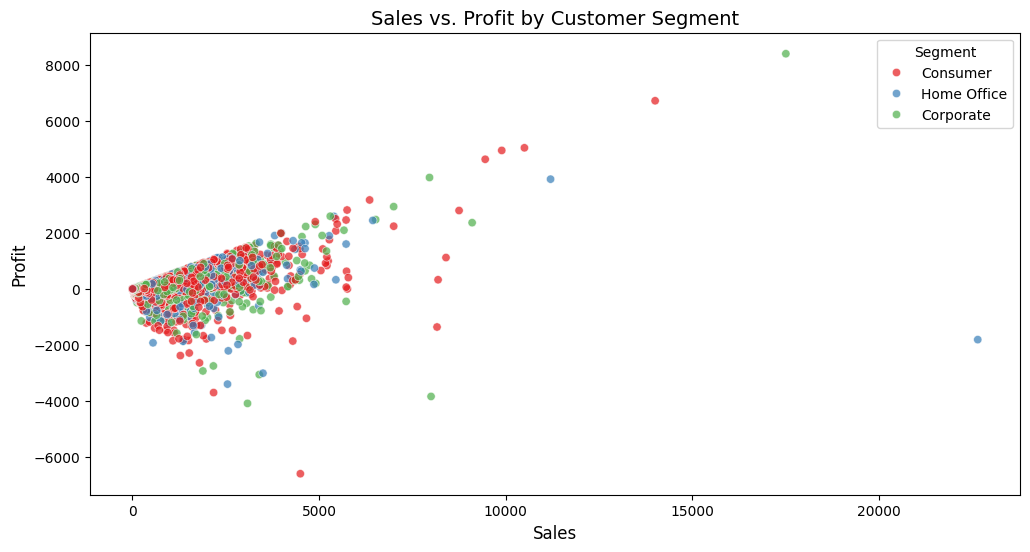

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot of Sales vs. Profit by Customer Segment
sns.scatterplot(x='Sales', y='Profit', hue='Segment', data=df, palette='Set1', alpha=0.7)

# Formatting the plot
plt.title('Sales vs. Profit by Customer Segment', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Show the plot
plt.show()


### Summary of Custom Analysis

- There is a dip in profit in every first quarter.
- Q4 is usually the highest profit of the year.
- Profit is trending upwards over time
- Our profit vs. sales trend is positive, which means the more the sale is for, the higher our profit.
- SOuth America and Eastern Asia have the two biggest profit distributions.
- Phones are the top selling sub-category.
- Average profit is relatively the same across different ship modes.
- Medium order priority has the potential for higher profits.
- The sales vs. profit by segment is completely random.